In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# License: MIT

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

np.random.seed(42)

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, :2] # we only take the first two features
y = iris.target

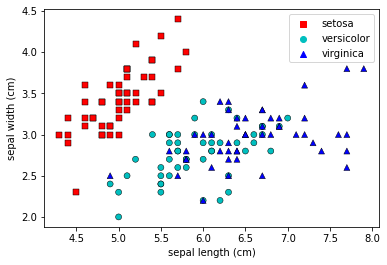

In [3]:
# Plot the data set
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y], style=iris.target_names[y], 
                palette=['r','c','b'], markers=('s','o','^'), edgecolor='k')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.savefig('figures/iris.pdf')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [6]:
print(f'Training set accuracy: {clf.score(X_train, y_train):.4f}')
print(f'Test set accuracy: {clf.score(X_test, y_test):.4f}')

Training set accuracy: 0.9554
Test set accuracy: 0.7895


In [7]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_depth': np.arange(3, 10),
    'max_features': ['sqrt', 'log2', None],
    'max_samples': np.linspace(0.5, 1.0, 6)
}

grid = RandomizedSearchCV(RandomForestClassifier(), param_grid, n_iter=25, cv=3, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

print(grid.best_params_)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
{'n_estimators': 500, 'max_samples': 0.6, 'max_features': 'log2', 'max_depth': 3}


In [8]:
print(f'Training set accuracy: {grid.score(X_train, y_train):.4f}')
print(f'Test set accuracy: {grid.score(X_test, y_test):.4f}')

Training set accuracy: 0.8125
Test set accuracy: 0.8158


In [9]:
from matplotlib.colors import ListedColormap

def plot_decision_boundaries(clf, X, y, feature_names, class_names, 
                             colors=['r', 'c', 'b'], markers=('s', 'o', '^')):  
    cmap = ListedColormap(colors)
      
    # Create a mesh of n sample points in the range [x1_min, x1_max] x [x2_min, x2_max]
    n = 1000 
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
    x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, n), np.linspace(x2_min, x2_max, n))
    
    # Find the label of each point in the mesh
    y_pred = clf.predict(np.c_[x1.ravel(), x2.ravel()])
    y_pred = y_pred.reshape(x1.shape) 
    
    # Put the result into a color plot  
    plt.contourf(x1, x2, y_pred, cmap=cmap, alpha=0.4)
    
    # Plot the points from the data set
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=class_names[y], style=class_names[y], 
                    palette=colors, markers=markers, edgecolor='k')
    
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.legend()

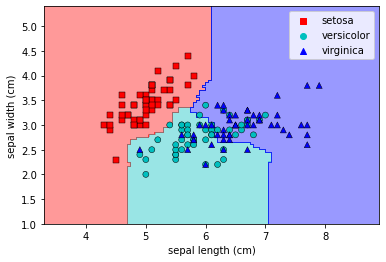

In [10]:
plot_decision_boundaries(grid, X, y, iris.feature_names, iris.target_names)
plt.savefig('figures/iris_random_forest_boundaries.pdf')